# Тест по теме "Продвинутая визуализация".

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
urban = pd.read_csv('data/UrbanizationCensusTract.csv')

#### Описание данных
- statefip — номер штата США или территории в ведении США
- state — название штата или территории
- gisjoin — номер переписного района согласно данным переписи 2010 года
- lat_tract, long_tract — широта и долгота центра переписного района
- population — число жителей переписного района
- adj_radiuspop_5 — оцененное значение числа жителей в радиусе пяти миль от переписного пункта
- urbanindex — индекс того, насколько городской или сельской является данный район
- log_pop — логарифм населения переписного пункта

#### 1. Какой график лучше всех подойдет для визуализации распределения переменной urbanindex? Выберите один верный ответ.

*Ответ: гистограмма.*

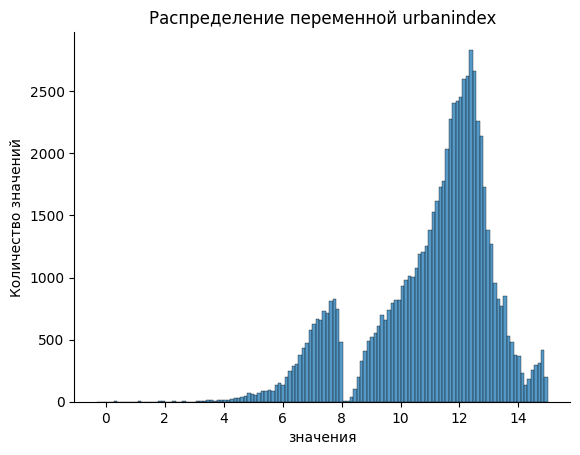

In [4]:
fig = sns.histplot(urban['urbanindex'])
fig.set_title('Распределение переменной urbanindex')
fig.set_xlabel('значения')
fig.set_ylabel('Количество значений')
fig.spines['right'].set_visible(False)
fig.spines['top'].set_visible(False)

del fig

#### 2. Укажите, верно ли следующее утверждение: для определения выбросов и аномальных значений в переменной population подойдет ящик с усами.

*Ответ: утверждение верно.*

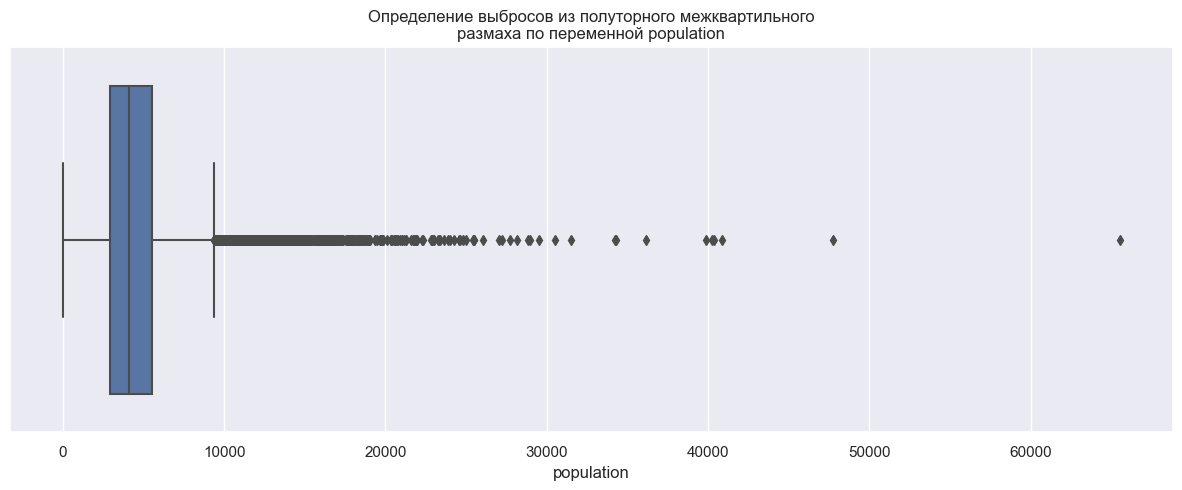

In [99]:
fig = sns.boxplot(x=urban['population'])
fig.set_title('Определение выбросов из полуторного межквартильного\nразмаха по переменной population')
del fig

#### 3. Укажите, верно ли следующее утверждение: для визуализации распределения числа жителей каждого переписного района Аляски лучше всего подойдет гистограмма.

*Ответ: утверждение верно.*

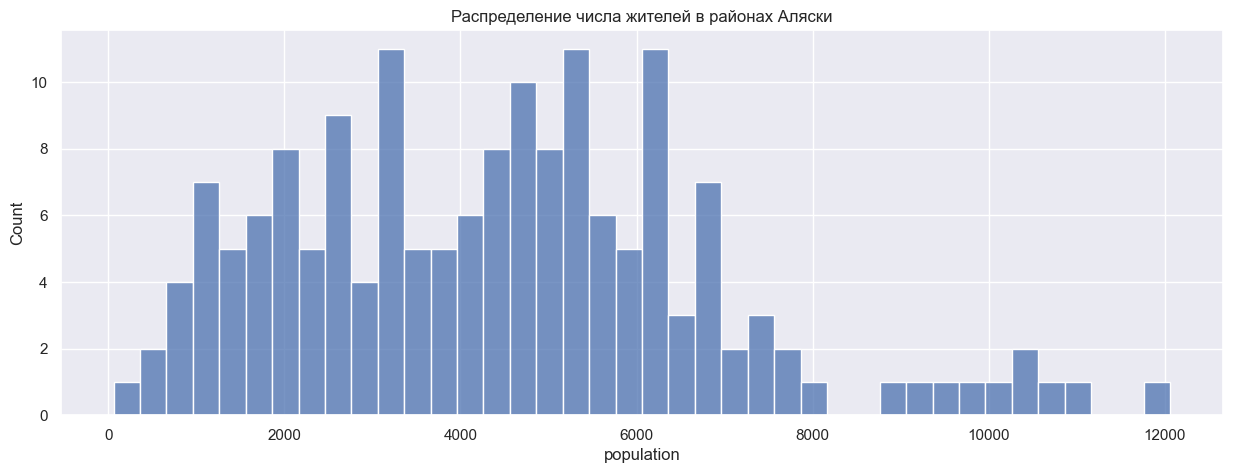

In [96]:
alaska = urban[urban['state'] == 'Alaska']
fig = sns.histplot(alaska['population'], binwidth=300)
fig.set_title('Распределение числа жителей в районах Аляски')
del alaska, fig

#### 4. Постройте ящики с усами для каждого из указанных штатов (California, Nebraska, Arizona, Texas) по переменной urbanindex. Выберите штат, в котором нет выбросов по данной переменной. Выберите один верный ответ.

*Ответ: Небраска.*

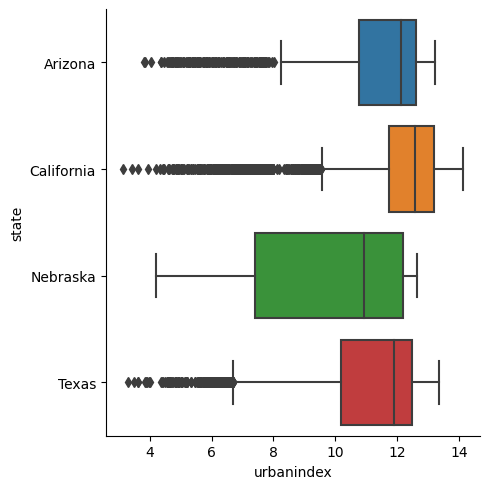

In [7]:
few_states = urban[
                 (urban['state'] == 'California')
                 | (urban['state'] == 'Nebraska')
                 | (urban['state'] == 'Arizona')
                 | (urban['state'] == 'Texas')
                 ]

fig = sns.catplot(
          x='urbanindex',
          y='state',
          kind='box',
          data=few_states,
          )
del fig, few_states

#### 5. Постройте тепловую карту по переменным population, adj_radiuspop_5 и urbanindex. Какой вывод можно сделать на основе полученных данных? Выберите один верный ответ.
*Ответ: Число жителей переписного района и число жителей в радиусе пяти миль от переписного пункта практически никак не связаны.*

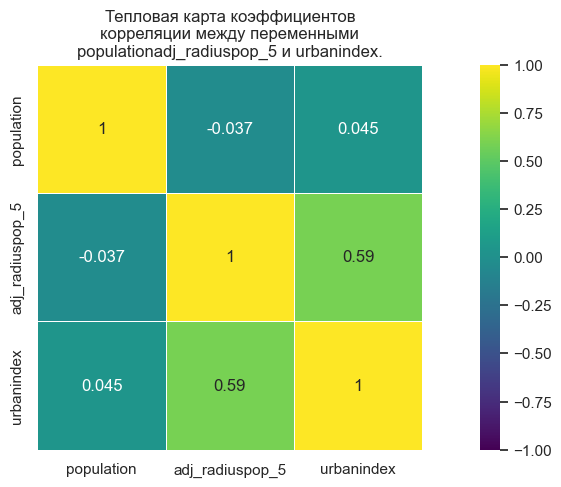

In [74]:
cols_num = ['population', 'adj_radiuspop_5', 'urbanindex']
correlation = urban.corr().loc[cols_num, cols_num]

fig = sns.heatmap(correlation, 
            linewidths=0.5, annot=True, cmap='viridis',
            linecolor="white", annot_kws = {'size':12},
            vmax=1, vmin=-1, square=True
            )
fig.set_title('Тепловая карта коэффициентов\nкорреляции между переменными\npopulation'
              'adj_radiuspop_5 и urbanindex.'
              )
del cols_num, correlation, fig

##### 6. Основываясь на графике из предыдущего пункта, запишите коэффициент корреляции между переменными adj_radiuspop_5 и urbanindex. Введите ответ в виде десятичного числа, до двух знаков.

*Ответ: 0.59*

#### 7. Посмотрите на штаты Аляска (Alaska), Оклахома (Oklahoma), Северная Дакота (North Dakota) и Монтана (Montana). Сколько из указанных штатов не содержат выбросы по переменной population? Попробуйте построить ящики с усами для каждого штата и ответить на вопрос. Введите ответ в виде целого числа.

*Ответ: 0*

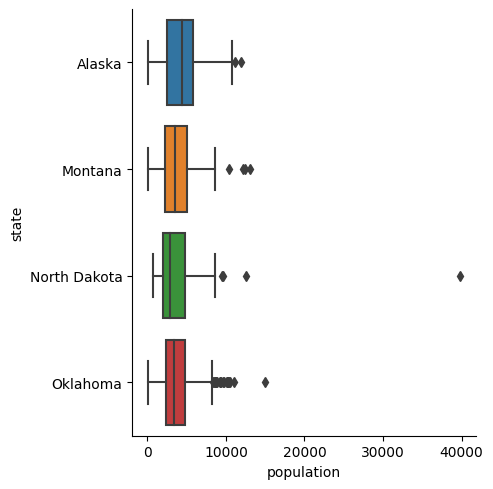

In [9]:
few_states = urban[
                 (urban['state'] == 'Alaska')
                 | (urban['state'] == 'Oklahoma')
                 | (urban['state'] == 'North Dakota')
                 | (urban['state'] == 'Montana')
                 ]

fig = sns.catplot(
          x='population',
          y='state',
          kind='box',
          data=few_states,
          )
del fig, few_states

#### 8. Постройте гистограмму для переменной urbanindex в штате Оклахома. Укажите, верно ли следующее утверждение: в штате Оклахома (Oklahoma) переменная urbanindex распределена нормально.

*Ответ: утверждение ложно.*

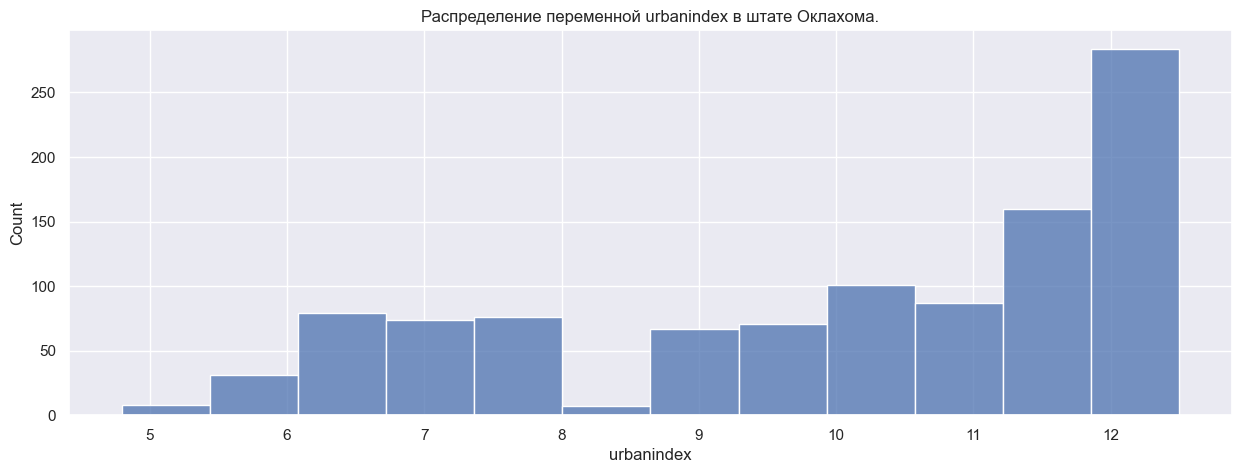

In [102]:
oklahoma = urban[urban['state'] == 'Oklahoma']
fig = sns.histplot(oklahoma['urbanindex'])
fig.set_title('Распределение переменной urbanindex в штате Оклахома.')
del fig, oklahoma

#### 9. Укажите, верно ли следующее утверждение: при построении ящика с усами для Канзаса (Kansas) и Кентукки (Kentucky) по переменной urbanindex мы увидим одинаковое количество выбросов.
*Ответ: утверждение верно, выбросов нет ни у того, ни у другого.*

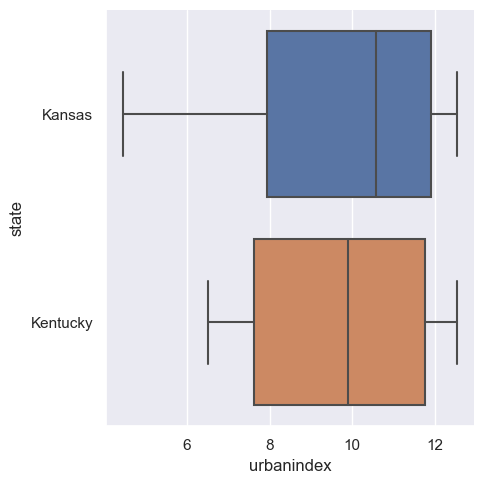

In [100]:

few_states = urban[(urban['state'] == 'Kansas') | (urban['state'] == 'Kentucky')]
sns.catplot(
    x='urbanindex',
    y='state',
    kind='box',
    data=few_states
)

del few_states

#### 10. Постройте тепловую карту и определите, в каком штате сильнее всего коррелируют показатели population и adj_radiuspop_5? В ответ запишите номер штата (согласно столбцу statefips).

*Ответ: 22*

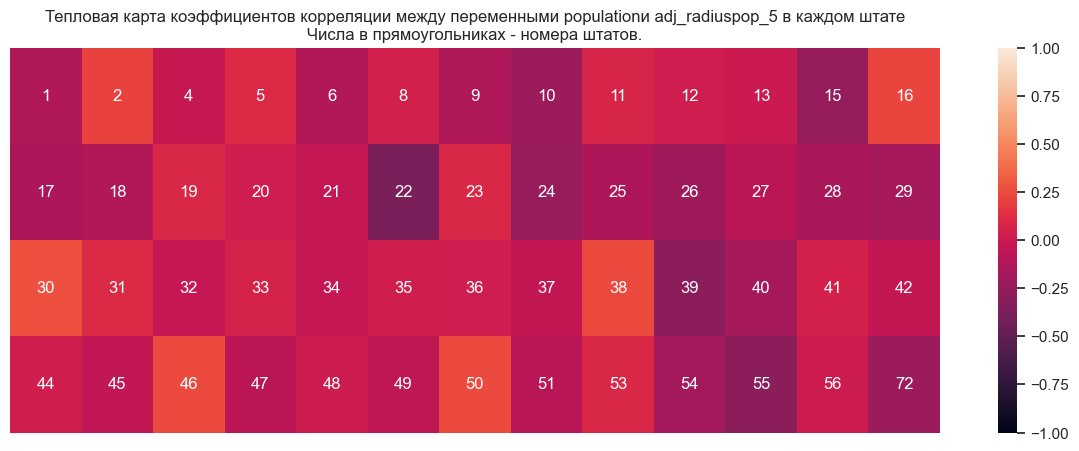

In [101]:
# Сформируем список штатов
states = urban['statefips'].unique().tolist()
# Заведём пустой список, куда будем записывать данные о корреляционных коэффициентах штатов.
corr_statefips = []
# Пройдёмся в цикле по всем штатам.
for state in states:
    # Выберем данные для конкретного штата
    df = urban[urban['statefips'] == state]
    # Рассчитаем корреляционный коэффицинт для этого штата между
    # переменными population adj_radiuspop_5 и запомним его.
    corr_statefips.append(df['population'].corr(df['adj_radiuspop_5']))

# Свормируем из полученных массивов матрицы, чтобы построить тепловую карту.
correlation = np.array(corr_statefips).reshape((4, 13))
states = np.array(states).reshape((4, 13))

fig = sns.heatmap(data=correlation, vmin=-1, vmax=1, annot=states, xticklabels=False, yticklabels=False)
fig.set_title('Тепловая карта коэффициентов корреляции между переменными population'
              'и adj_radiuspop_5 в каждом штате\nЧисла в прямоугольниках - номера штатов.'
              )
del states, corr_statefips, correlation, fig